In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

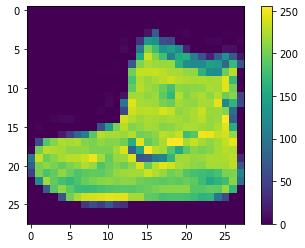

In [6]:
plt.imshow(train_images[0])
plt.colorbar()

In [7]:
train_images = train_images / 255
test_images = test_images/ 255

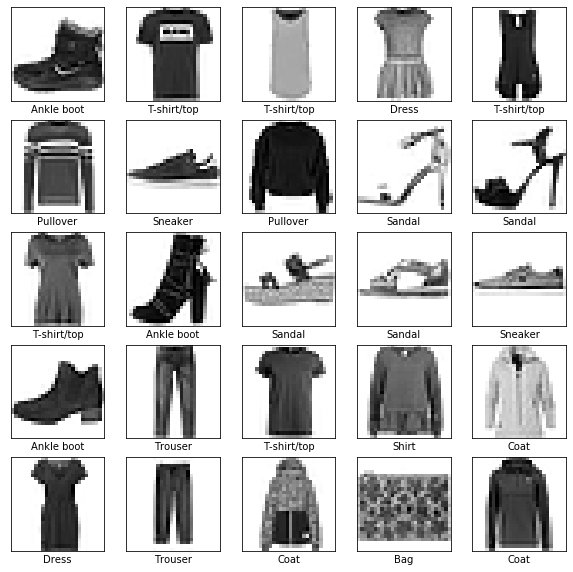

In [9]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    
plt.show()

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

In [12]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6306 - accuracy: 0.7816
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3838 - accuracy: 0.8623
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3396 - accuracy: 0.8760
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3124 - accuracy: 0.8838
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2977 - accuracy: 0.8894
Epoch 6/10
1875/1875 [==============================] - 2s 995us/step - loss: 0.2815 - accuracy: 0.8951
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2643 - accuracy: 0.9031
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2574 - accuracy: 0.9027
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2453 - accuracy: 0.9069
Epoch 10/10
1875/1875 [==============================] - 2s 974us/step - loss: 0

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc, test_loss)

313/313 [==============================] - 0s 985us/step - loss: 0.3527 - accuracy: 0.8770
0.8769999742507935 0.3527148365974426


In [15]:
pred = model.predict(test_images)

In [17]:
pred[0]

array([8.8249914e-09, 4.8467883e-12, 8.4626289e-10, 6.9978701e-10,
       1.8987981e-11, 1.9903955e-04, 6.8515112e-07, 1.2679687e-02,
       1.6893708e-07, 9.8712033e-01], dtype=float32)

In [18]:
np.argmax(pred[0])

9

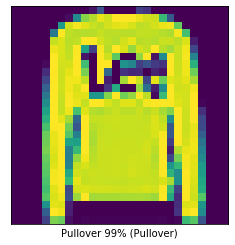

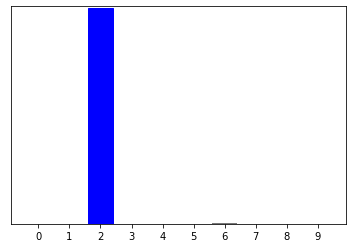

In [31]:
def plot_image(i):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    prd = np.argmax(pred[i])
    if prd == test_labels[i]:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel('{} {:2.0f}% ({})'.format(class_names[prd], 100* np.max(pred[i]), class_names[test_labels[i]], color=color))
    
    plt.imshow(test_images[i])
    plt.show()
    
def plot_value(i):
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    b = plt.bar(range(10), pred[i], color='#777777')
    plt.ylim([0, 1])
    pred_label = np.argmax(pred[i])
    
    b[pred_label].set_color('red')
    b[test_labels[i]].set_color('blue')
    plt.show()
    
plot_image(1)
plot_value(1)

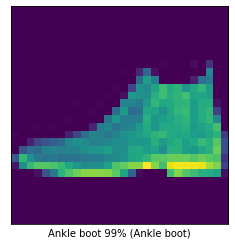

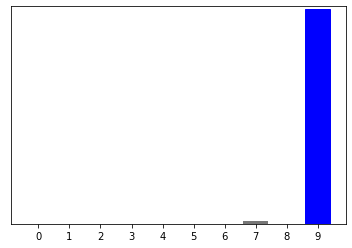

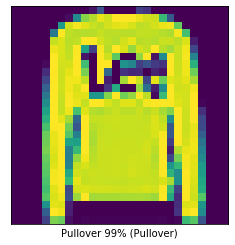

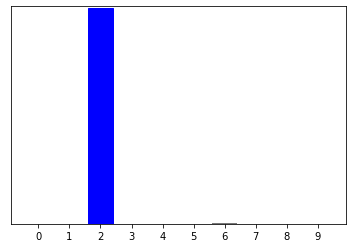

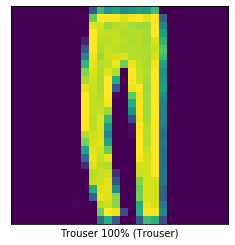

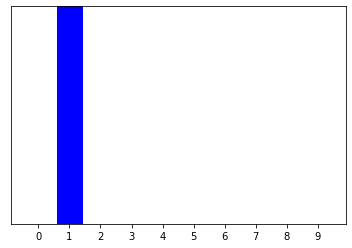

In [32]:
for i in range(3): 
    plot_image(i)
    plot_value(i)

### Text classification

In [33]:
imdb = keras.datasets.imdb

(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\Public\anaconda\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Public\anaconda\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must 

In [34]:
len(train_data)

25000

In [36]:
print(train_data[0][:10], train_label[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65] 1


In [38]:
word_index = imdb.get_word_index()

word_index = {k: v+3 for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = {v: k for k, v in word_index.items()}

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, "?") for i in text])

decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [39]:
len(word_index)

88588

In [40]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data, value=word_index['<PAD>'], padding='post', maxlen=256)
test_data = keras.preprocessing.sequence.pad_sequences(test_data, value=word_index['<PAD>'], padding='post', maxlen=256)

In [41]:
len(train_data[0])

256

In [42]:
train_data[0]

array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
        838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
          4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
       1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
        147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
         71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
          4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
         62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
         16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
          5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
         22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
          2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
       3766,    5,  723,   36,   71,   43,  530,  4

In [44]:
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D

vocab_size = 10000

model = Sequential()
model.add(Embedding(vocab_size, 16))
model.add(GlobalAveragePooling1D())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [45]:
his = model.fit(train_data, train_label, epochs=10, batch_size=512, validation_split=.1, verbose=1)

Epoch 1/10
44/44 [==============================] - 1s 20ms/step - loss: 0.6920 - accuracy: 0.5242 - val_loss: 0.6863 - val_accuracy: 0.6824
Epoch 2/10
44/44 [==============================] - 1s 17ms/step - loss: 0.6814 - accuracy: 0.7095 - val_loss: 0.6627 - val_accuracy: 0.7592
Epoch 3/10
44/44 [==============================] - 1s 16ms/step - loss: 0.6521 - accuracy: 0.7601 - val_loss: 0.6179 - val_accuracy: 0.7900
Epoch 4/10
44/44 [==============================] - 1s 19ms/step - loss: 0.6005 - accuracy: 0.8047 - val_loss: 0.5567 - val_accuracy: 0.8064
Epoch 5/10
44/44 [==============================] - 1s 18ms/step - loss: 0.5326 - accuracy: 0.8265 - val_loss: 0.4912 - val_accuracy: 0.8360
Epoch 6/10
44/44 [==============================] - 1s 21ms/step - loss: 0.4601 - accuracy: 0.8580 - val_loss: 0.4356 - val_accuracy: 0.8516
Epoch 7/10
44/44 [==============================] - 1s 24ms/step - loss: 0.4048 - accuracy: 0.8701 - val_loss: 0.3939 - val_accuracy: 0.8600
Epoch 8/10
44

In [46]:
res = model.evaluate(test_data, test_label)

print('test score: {}, test loss: {}'.format(res[1], res[0]))

782/782 [==============================] - 1s 894us/step - loss: 0.3331 - accuracy: 0.8686
test score: 0.8686000108718872, test loss: 0.3331236243247986


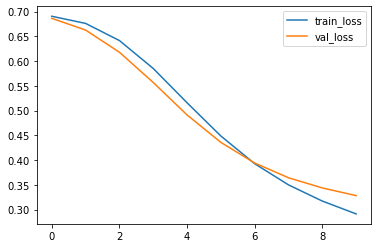

In [50]:
plt.plot(his.history['loss'], label='train_loss')
plt.plot(his.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

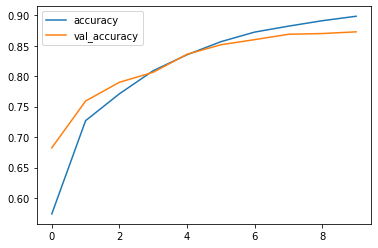

In [52]:
plt.plot(his.history['accuracy'], label='accuracy')
plt.plot(his.history['val_accuracy'], label='val_accuracy')

plt.legend()
plt.show()

### Text generation based on char

In [53]:
path_to_file = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

text = open(path_to_file, 'rb').read().decode('utf-8')
print(len(text))

1115394


In [54]:
print(text[:250])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.



In [55]:
vocab = sorted(set(text))
print(len(vocab))

65


In [56]:
char2idx = {u: i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

text_as_int = np.array([char2idx[c] for c in text])

In [58]:
print(char2idx)

{'\n': 0, ' ': 1, '!': 2, '$': 3, '&': 4, "'": 5, ',': 6, '-': 7, '.': 8, '3': 9, ':': 10, ';': 11, '?': 12, 'A': 13, 'B': 14, 'C': 15, 'D': 16, 'E': 17, 'F': 18, 'G': 19, 'H': 20, 'I': 21, 'J': 22, 'K': 23, 'L': 24, 'M': 25, 'N': 26, 'O': 27, 'P': 28, 'Q': 29, 'R': 30, 'S': 31, 'T': 32, 'U': 33, 'V': 34, 'W': 35, 'X': 36, 'Y': 37, 'Z': 38, 'a': 39, 'b': 40, 'c': 41, 'd': 42, 'e': 43, 'f': 44, 'g': 45, 'h': 46, 'i': 47, 'j': 48, 'k': 49, 'l': 50, 'm': 51, 'n': 52, 'o': 53, 'p': 54, 'q': 55, 'r': 56, 's': 57, 't': 58, 'u': 59, 'v': 60, 'w': 61, 'x': 62, 'y': 63, 'z': 64}


In [59]:
print('text: {} convert into {}'.format(text[:20], text_as_int[:20]))

text: First Citizen:
Befor convert into [18 47 56 57 58  1 15 47 58 47 64 43 52 10  0 14 43 44 53 56]


In [60]:
seq_length = 100
examples_per_epoch = len(text) // seq_length

char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

for i in char_dataset.take(5):
    print(idx2char[i.numpy()])

F
i
r
s
t


In [62]:
sequences = char_dataset.batch(seq_length + 1, drop_remainder=True)

for i in sequences.take(5):
    print('*' * 10)
    print(''.join(idx2char[i.numpy()]))

**********
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You 
**********
are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you k
**********
now Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us ki
**********
ll him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be d
**********
one: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor citi


In [63]:
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)

In [64]:
for i, t in dataset.take(1):
    print('input: ', idx2char[i.numpy()])
    print('target: ', idx2char[t.numpy()])

input:  ['F' 'i' 'r' 's' 't' ' ' 'C' 'i' 't' 'i' 'z' 'e' 'n' ':' '\n' 'B' 'e' 'f'
 'o' 'r' 'e' ' ' 'w' 'e' ' ' 'p' 'r' 'o' 'c' 'e' 'e' 'd' ' ' 'a' 'n' 'y'
 ' ' 'f' 'u' 'r' 't' 'h' 'e' 'r' ',' ' ' 'h' 'e' 'a' 'r' ' ' 'm' 'e' ' '
 's' 'p' 'e' 'a' 'k' '.' '\n' '\n' 'A' 'l' 'l' ':' '\n' 'S' 'p' 'e' 'a'
 'k' ',' ' ' 's' 'p' 'e' 'a' 'k' '.' '\n' '\n' 'F' 'i' 'r' 's' 't' ' ' 'C'
 'i' 't' 'i' 'z' 'e' 'n' ':' '\n' 'Y' 'o' 'u']
target:  ['i' 'r' 's' 't' ' ' 'C' 'i' 't' 'i' 'z' 'e' 'n' ':' '\n' 'B' 'e' 'f' 'o'
 'r' 'e' ' ' 'w' 'e' ' ' 'p' 'r' 'o' 'c' 'e' 'e' 'd' ' ' 'a' 'n' 'y' ' '
 'f' 'u' 'r' 't' 'h' 'e' 'r' ',' ' ' 'h' 'e' 'a' 'r' ' ' 'm' 'e' ' ' 's'
 'p' 'e' 'a' 'k' '.' '\n' '\n' 'A' 'l' 'l' ':' '\n' 'S' 'p' 'e' 'a' 'k'
 ',' ' ' 's' 'p' 'e' 'a' 'k' '.' '\n' '\n' 'F' 'i' 'r' 's' 't' ' ' 'C' 'i'
 't' 'i' 'z' 'e' 'n' ':' '\n' 'Y' 'o' 'u' ' ']


In [66]:
for t, (i_idx, t_idx) in enumerate(zip(i[:5], t[:5])):
    print(" step: {}".format(t))
    print(' input: {}({})'.format(i_idx, idx2char[i_idx]))
    print(' target: {}({})'.format(t_idx, idx2char[t_idx]))

 step: 0
 input: 18(F)
 target: 47(i)
 step: 1
 input: 47(i)
 target: 56(r)
 step: 2
 input: 56(r)
 target: 57(s)
 step: 3
 input: 57(s)
 target: 58(t)
 step: 4
 input: 58(t)
 target: 1( )


In [67]:
batch_size = 64
buffer_size = 10000

dataset = dataset.shuffle(buffer_size).batch(batch_size, drop_remainder=True)

dataset

<BatchDataset shapes: ((64, 100), (64, 100)), types: (tf.int32, tf.int32)>

In [68]:
from tensorflow.keras.layers import GRU

vocab_size = len(vocab)
em_size = 256

rnn_units = 1024

model = Sequential()
model.add(Embedding(vocab_size, em_size, batch_input_shape=[batch_size, None]))
model.add(GRU(rnn_units, return_sequences=True, stateful=True, recurrent_initializer='glorot_uniform'))
model.add(Dense(vocab_size))


model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (64, None, 256)           16640     
_________________________________________________________________
gru (GRU)                    (64, None, 1024)          3938304   
_________________________________________________________________
dense_4 (Dense)              (64, None, 65)            66625     
Total params: 4,021,569
Trainable params: 4,021,569
Non-trainable params: 0
_________________________________________________________________


In [69]:
for input_batch, target_batch in dataset.take(1):
    model_pred = model(input_batch)
    
    print(model_pred.shape)

(64, 100, 65)


In [70]:
sample_indices = tf.random.categorical(model_pred[0], num_samples=1)
sample_indices = tf.squeeze(sample_indices, axis=-1).numpy()

sample_indices

array([ 9, 45, 46, 31, 57, 61, 47, 14, 38, 59, 44, 29, 48,  6, 25, 54, 28,
       18, 10, 44, 16,  7, 24, 23, 38, 34, 38, 44, 37, 25, 45, 64,  6, 62,
       24, 64, 49, 25, 48, 43, 57, 39, 62, 54, 38, 54, 62, 33, 61, 60, 15,
       40, 38, 49, 48,  1, 37, 52, 10, 50, 16,  1, 25, 59,  3, 34, 46, 40,
       54, 20, 59, 22, 61, 41,  6, 11, 55, 45, 61, 59,  9, 18, 61, 24, 48,
       63, 38,  5, 21, 38, 38, 12, 16,  1, 38, 46, 20, 36, 44, 10],
      dtype=int64)

In [81]:
input_batch

<tf.Tensor: shape=(64, 100), dtype=int32, numpy=
array([[46,  1, 59, ..., 53, 59, 52],
       [ 1, 21,  1, ..., 58,  5, 57],
       [39, 47, 52, ..., 47, 52, 41],
       ...,
       [61,  1, 58, ...,  1, 39,  1],
       [46, 53, 59, ...,  6,  0, 37],
       [43,  1, 25, ..., 43, 52, 58]])>

In [71]:
print('Input: {}'.format(''.join(idx2char[input_batch[0]])))
print('pred: {}'.format(''.join(idx2char[sample_indices])))

Input: h us,
If we would have you.

Second Lady:
She is spread of late
Into a goodly bulk: good time encoun
pred: 3ghSswiBZufQj,MpPF:fD-LKZVZfYMgz,xLzkMjesaxpZpxUwvCbZkj Yn:lD Mu$VhbpHuJwc,;qgwu3FwLjyZ'IZZ?D ZhHXf:


In [72]:
def loss(labels,logits):
    return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

ex_loss = loss(target_batch, model_pred)
print(ex_loss)

tf.Tensor(
[[4.1732864 4.1646037 4.1672363 ... 4.17522   4.176919  4.201512 ]
 [4.182061  4.1741815 4.1601424 ... 4.1727366 4.1704216 4.161307 ]
 [4.17335   4.1600113 4.1795115 ... 4.1665053 4.1590757 4.195449 ]
 ...
 [4.1834683 4.1664495 4.1858277 ... 4.1928945 4.172852  4.173703 ]
 [4.172202  4.1696196 4.1565285 ... 4.1667237 4.162725  4.170923 ]
 [4.163406  4.174515  4.1822443 ... 4.177852  4.1904793 4.1721797]], shape=(64, 100), dtype=float32)


In [73]:
ex_loss.numpy().mean()

4.1732655

In [75]:
model.compile(loss=loss, metrics=['accuracy'], optimizer='adam')

his = model.fit(dataset,epochs=10)

Epoch 1/10
 54/172 [========>.....................] - ETA: 4:38 - loss: 3.4170 - accuracy: 0.1594

KeyboardInterrupt: 

In [82]:
def generate_text(start_string):
    n_gen = 1000
    
    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)
    
    text_gen = []
    tmp = 1.0
    
    # model.reset_states()
    for i in range(n_gen):
        pred = model(input_eval)
        pred = tf.squeeze(pred, 0)
        
        pred = pred / tmp
        pred_id = tf.random.categorical(pred, num_samples=1)[-1, 0].numpy()
        
        input_eval = tf.expand_dims([pred_id], 0)
        text_gen.append(idx2char[pred_id])
        
    return start_string + ''.join(text_gen)

In [96]:
start_string = "ROMEO: "

input_eval = [char2idx[s] for s in start_string]
input_eval.extend([0 for _ in range(100 - len(input_eval))])
input_eval = tf.expand_dims(input_eval, 0)

input_eval.shape


TensorShape([1, 100])

In [80]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (64, None, 256)           16640     
_________________________________________________________________
gru (GRU)                    (64, None, 1024)          3938304   
_________________________________________________________________
dense_4 (Dense)              (64, None, 65)            66625     
Total params: 4,021,569
Trainable params: 4,021,569
Non-trainable params: 0
_________________________________________________________________


#### Embedding with trained model based on TF HUB

In [115]:
import tensorflow_hub as hub

sample_text = "Simplicity: Standard use-cases should work out-of-the box"
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], dtype=tf.string, trainable=True)

hub_layer([sample_text])

<tf.Tensor: shape=(1, 20), dtype=float32, numpy=
array([[ 0.24061593, -0.37238908,  0.88043296,  1.5157663 , -0.29032376,
        -1.208712  ,  0.22360168,  0.15568238, -0.5396049 , -0.05724035,
        -0.15658702,  0.5125637 , -1.1287129 ,  0.06606799, -0.24776784,
         0.10634329,  0.7633406 , -0.3351109 , -0.38831642, -0.441141  ]],
      dtype=float32)>

In [116]:
import tensorflow_datasets as tfds

In [ ]:
train_data, validation_data, test_data = tfds.load("imdb_reviews", split=('train[:60%]', 'train[60%:]', 'test'), as_supervised=True)

#### Regression


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow import keras as keras
from tensorflow.keras.layers import Dense

In [5]:
tf.__version__

'2.4.1'

In [6]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'C:\\Users\\guangqiiang.lu\\.keras\\datasets\\auto-mpg.data'

In [14]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(dataset_path, names=column_names, na_values='?', comment='\t', sep= ' ', skipinitialspace=True)
dataset = raw_dataset.copy()
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [15]:
dataset.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [16]:
dataset =dataset.dropna()

In [17]:
dataset = pd.concat([dataset, pd.get_dummies(dataset['Origin'], prefix='Origin')], axis=1)
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Origin_1,Origin_2,Origin_3
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,1,0,0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1,1,0,0


In [18]:
train_sample = dataset.sample(frac=.8)
test_sampel = dataset.drop(train_sample.index)

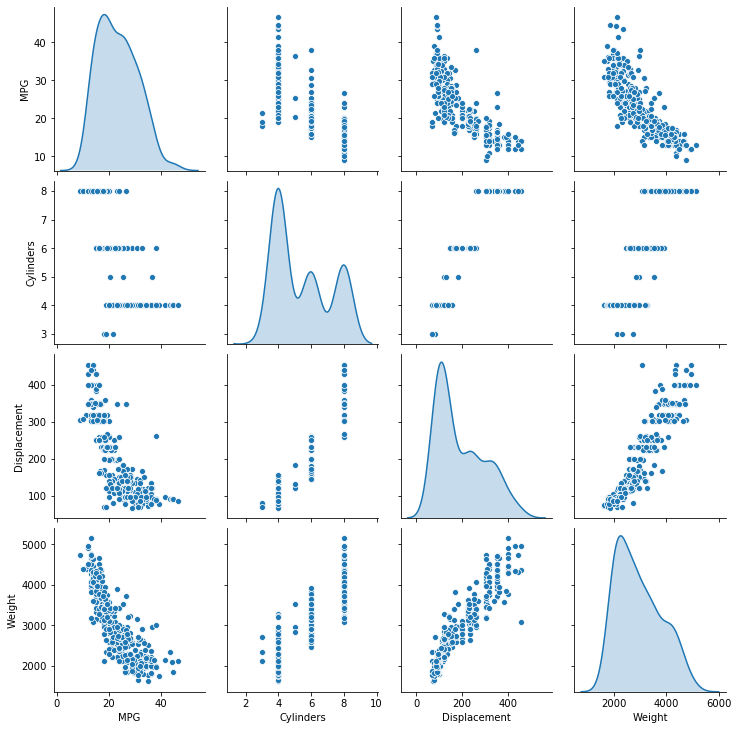

In [19]:
sns.pairplot(train_sample[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind='kde')

In [20]:
train_stats = train_sample.describe()
train_stats.pop('MPG')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.684684,3.0,4.000,4.00,8.00,8.0
Displacement,314.0,193.921975,103.950135,68.0,104.250,151.00,260.00,455.0
Horsepower,314.0,104.343949,37.843332,46.0,76.000,95.00,121.50,230.0
Weight,314.0,2964.105096,843.228077,1613.0,2223.750,2797.50,3568.25,5140.0
Acceleration,314.0,15.463694,2.699915,8.0,13.525,15.45,17.00,24.8
Model Year,314.0,75.964968,3.705024,70.0,73.000,76.00,79.00,82.0
Origin,314.0,1.579618,0.804360,1.0,1.000,1.00,2.00,3.0
Origin_1,314.0,0.621019,0.485908,0.0,0.000,1.00,1.00,1.0
Origin_2,314.0,0.178344,0.383413,0.0,0.000,0.00,0.00,1.0
Origin_3,314.0,0.200637,0.401116,0.0,0.000,0.00,0.00,1.0


In [21]:
train_labels = train_sample.pop('MPG')
test_labels = test_sampel.pop('MPG')

In [22]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

norm_train_data = norm(train_sample)
norm_test_data = norm(test_sampel)

In [23]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=[norm_train_data.shape[1]]))
model.add(Dense(1))

model.compile(loss='mse',  optimizer=tf.keras.optimizers.RMSprop(.001), metrics=['mae', 'mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                704       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________


In [25]:
class Printdoc(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 ==0:
            print('')
        print('.', end='')
        
epochs = 1000        
his = model.fit(norm_train_data, train_labels, epochs=epochs, validation_split=.2, verbose=0, callbacks=[Printdoc()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [27]:
hist = pd.DataFrame(his.history)
hist['epoch']= his.epoch

hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,4.181663,1.500256,4.181663,8.849881,2.000506,8.849881,995
996,4.208752,1.510977,4.208752,8.718298,1.971354,8.718298,996
997,4.189402,1.501256,4.189402,8.769802,1.983871,8.769802,997
998,4.227852,1.512604,4.227852,8.789204,1.996991,8.789204,998
999,4.240075,1.512431,4.240075,8.587130,1.941710,8.587130,999


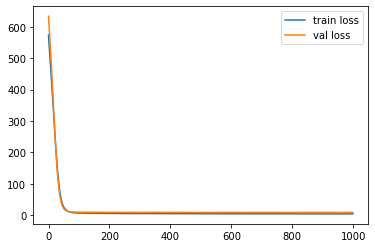

In [28]:
plt.plot(hist['loss'], label='train loss')
plt.plot(hist['val_loss'], label='val loss')
plt.legend()

plt.show()

In [38]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=[norm_train_data.shape[1]]))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))

model.compile(loss='mse',  optimizer=tf.keras.optimizers.RMSprop(.001), metrics=['mae', 'mse'])

model.summary()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)


his = model.fit(norm_train_data, train_labels, epochs=1000, validation_split=.2, verbose=0, callbacks=[Printdoc(), early_stop])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 64)                704       
_________________________________________________________________
dense_14 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 129       
Total params: 9,153
Trainable params: 9,153
Non-trainable params: 0
_________________________________________________________________

........................................................................

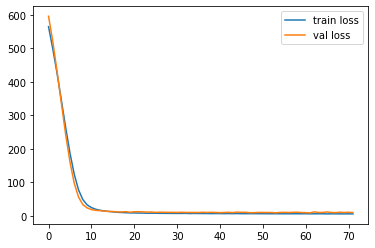

In [39]:
plt.plot(his.history['loss'], label='train loss')
plt.plot(his.history['val_loss'], label='val loss')
plt.legend()

plt.show()

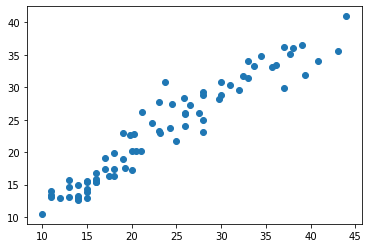

In [40]:
pred = model.predict(norm_test_data)

plt.scatter(test_labels, pred)
